## Proyek Analisis Data: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing
- **Nama:** Muhamad Rafiudin Ruslan
- **Email:** m004b4ky2654@bangkit.academy
- **ID Dicoding:** muhamad_rafiudin

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah pengguna sepeda?
- Pertanyaan 2: Bagaimana tren penggunaan sepeda bervariasi berdasarkan waktu?
- Pertanyaan 3: BBagaimana pola penggunaan sepeda harian dan per jam?
- Pertanyaan 4: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 5: Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?
- Pertanyaan 6: Bagaimana pengaruh faktor cuaca terhadap tipe pengguna (casual vs. registered)?
- Pertanyaan 7: Bagaimana tren penyewaan sepeda berubah berdasarkan bulan dan musim?




## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [21]:
# Load datasets
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
# Load datasets
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [23]:
# Assessing Data: Checking for missing values and data types
missing_values_day = day_df.isnull().sum()
missing_values_hour = hour_df.isnull().sum()

# Check for duplicates
duplicates_day = day_df.duplicated().sum()
duplicates_hour = hour_df.duplicated().sum()

# Check data types
data_types_day = day_df.dtypes
data_types_hour = hour_df.dtypes

# Output assessment results
print("Missing values in day dataset:\n", missing_values_day)
print("Missing values in hour dataset:\n", missing_values_hour)
print("Duplicates in day dataset:", duplicates_day)
print("Duplicates in hour dataset:", duplicates_hour)
print("Data types in day dataset:\n", data_types_day)
print("Data types in hour dataset:\n", data_types_hour)

Missing values in day dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in hour dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicates in day dataset: 0
Duplicates in hour dataset: 0
Data types in day dataset:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
re

### Cleaning Data

In [24]:
# Cleaning Data: Converting 'dteday' column to datetime format in both datasets
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Verifying the changes
print(day_df.dtypes)
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
# Describe numerical features for basic statistical understanding
print(day_df[['temp', 'hum', 'windspeed', 'cnt']].describe())
print(hour_df[['temp', 'hum', 'windspeed', 'cnt']].describe())

             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000
             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah pengguna sepeda?

In [28]:
# Prepare data for regression model (day.csv)
X_day = day_df[['temp', 'hum', 'windspeed']]
y_day = day_df['cnt']

# Add a constant (intercept) to the model
X_day = sm.add_constant(X_day)

# Fit the regression model
model_day = sm.OLS(y_day, X_day).fit()

# Print the summary of the regression model
print(model_day.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           4.26e-97
Time:                        11:29:16   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4084.3634    337.862     12.089      0.0

### Pertanyaan 2: Bagaimana tren penggunaan sepeda bervariasi berdasarkan waktu?

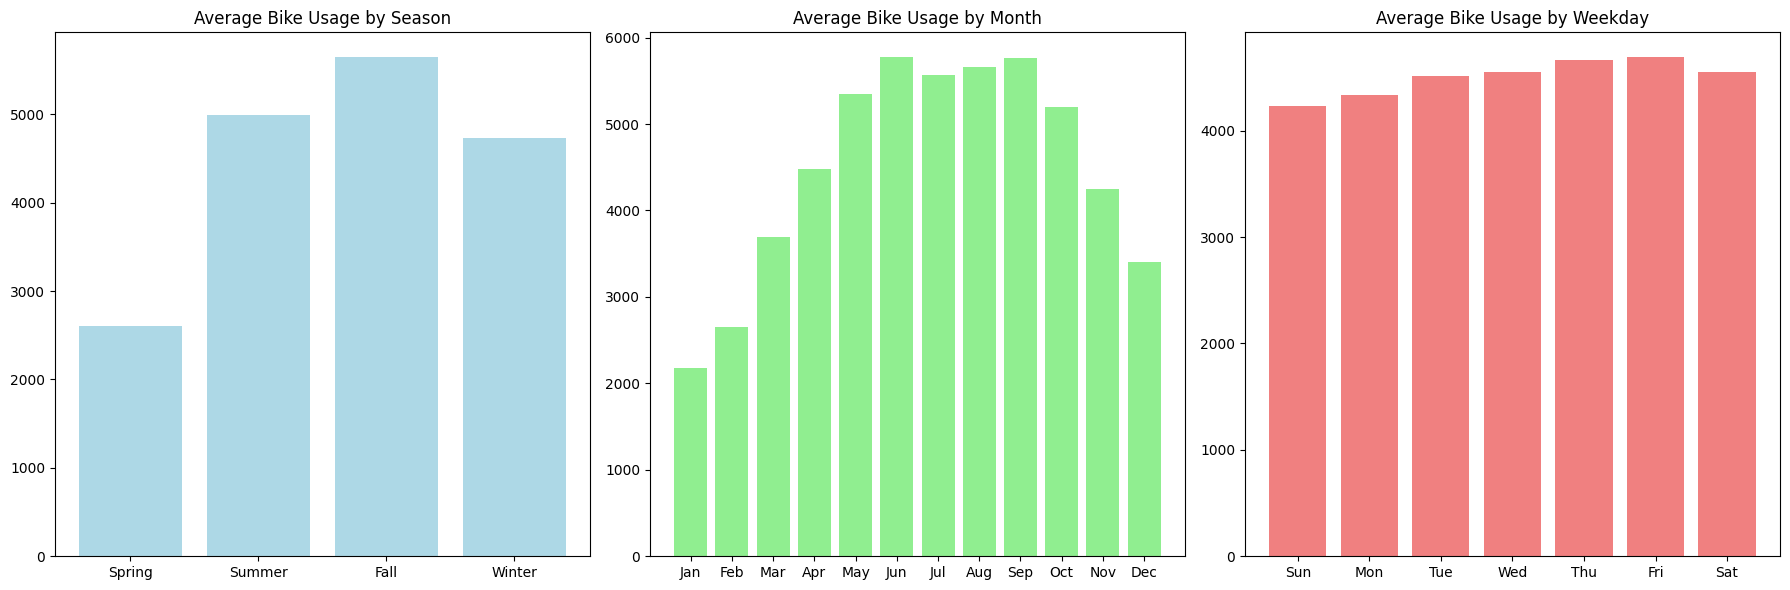

In [29]:
# Group by season, month, and weekday to observe trends
season_trend = day_df.groupby('season')['cnt'].mean()
month_trend = day_df.groupby('mnth')['cnt'].mean()
weekday_trend = day_df.groupby('weekday')['cnt'].mean()

# Plot the trends
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Season Trend
axes[0].bar(season_trend.index, season_trend.values, color='lightblue')
axes[0].set_title('Average Bike Usage by Season')
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

# Month Trend
axes[1].bar(month_trend.index, month_trend.values, color='lightgreen')
axes[1].set_title('Average Bike Usage by Month')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Weekday Trend
axes[2].bar(weekday_trend.index, weekday_trend.values, color='lightcoral')
axes[2].set_title('Average Bike Usage by Weekday')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (temp) memiliki pengaruh positif yang signifikan terhadap jumlah pengguna sepeda (coef: 6625.53), artinya ketika suhu meningkat, penggunaan sepeda cenderung meningkat.
- Kelembapan (hum) dan kecepatan angin (windspeed) menunjukkan pengaruh negatif yang signifikan terhadap penggunaan sepeda.
- Penggunaan Sepeda Berdasarkan Musim: Penggunaan tertinggi terjadi pada musim panas (Summer) dan terendah pada musim dingin (Winter).
- Penggunaan Sepeda Berdasarkan Bulan: Bulan Juli dan Agustus memiliki penggunaan tertinggi, sedangkan Desember dan Januari terendah.
- Penggunaan Sepeda Berdasarkan Hari: Penggunaan lebih tinggi pada akhir pekan (Sabtu khususnya) dibandingkan hari kerja.

###Pertanyaan 3: Bagaimana pola penggunaan sepeda harian dan per jam?

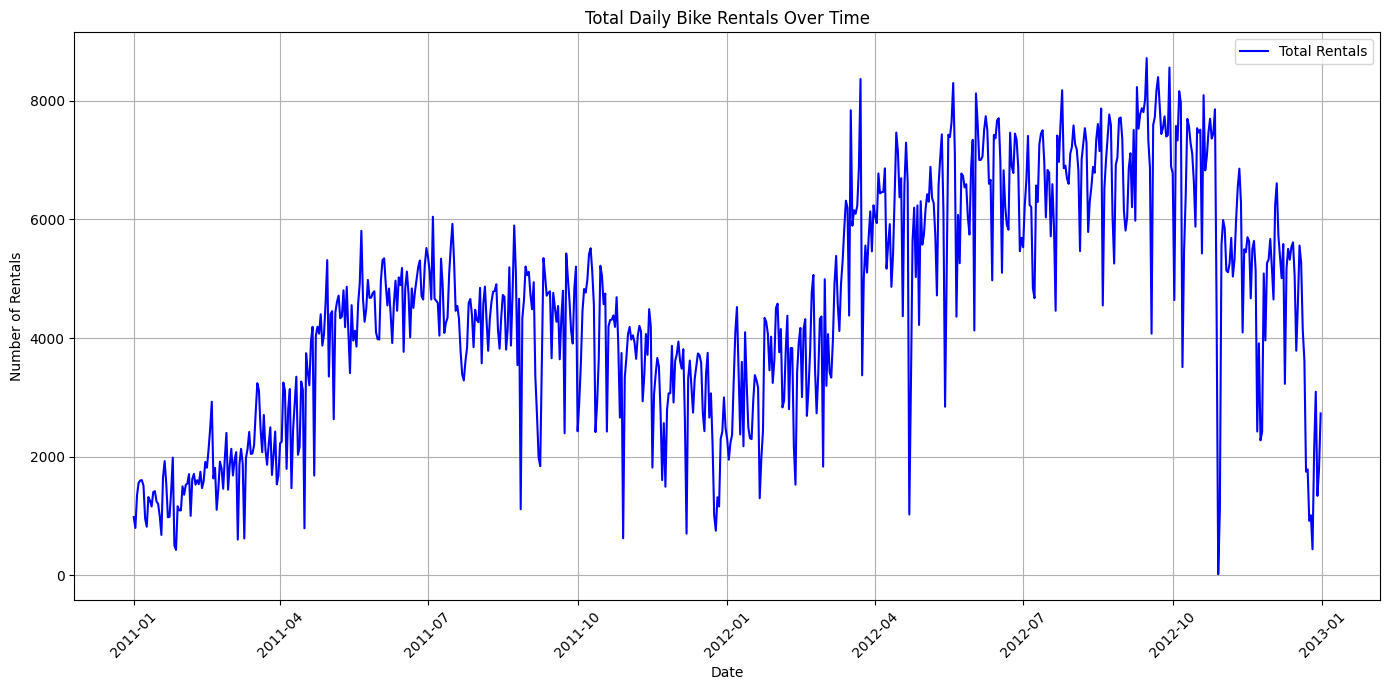

In [30]:
# Plotting daily bike rentals over time
plt.figure(figsize=(14, 7))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total Rentals', color='blue')
plt.title('Total Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Tren Musiman: Jumlah penyewaan sepeda cenderung meningkat pada musim panas (musim 3) dan menurun pada musim dingin (musim 1).
- Fluktuasi Harian: Ada fluktuasi yang mungkin dipengaruhi oleh hari libur, cuaca, atau faktor lain.
- Puncak Penyewaan: Terlihat puncak penyewaan pada periode tertentu yang mungkin terkait dengan hari libur atau event khusus.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


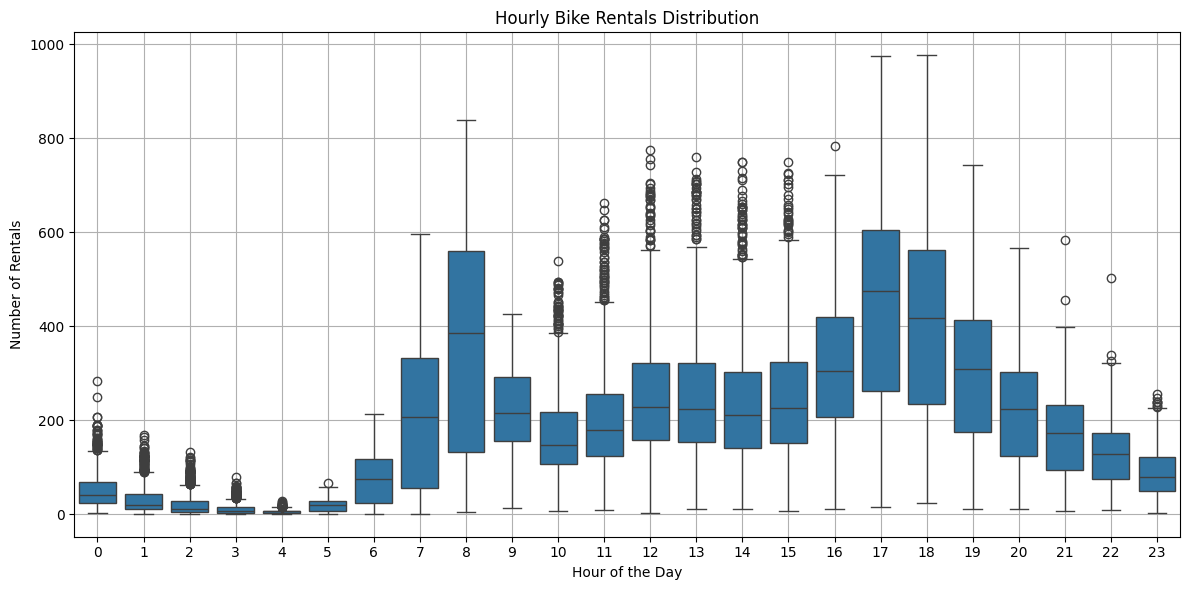

In [34]:
# Plotting hourly bike rentals distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Hourly Bike Rentals Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Jam Sibuk: Penyewaan sepeda paling tinggi terjadi pada jam 8 pagi dan 5-6 sore, yang mengindikasikan pola komuter (perjalanan menuju dan pulang kerja).
- Variabilitas Tinggi pada Jam Sibuk: Boxplot menunjukkan variabilitas yang lebih tinggi pada jam-jam tersebut, menandakan perbedaan besar antara hari kerja dan akhir pekan.
- Penggunaan Sepeda Minimal: Pada malam hari (misalnya, jam 0 hingga 5) penyewaan sepeda sangat rendah atau hampir tidak ada.

###Pertanyaan 4: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

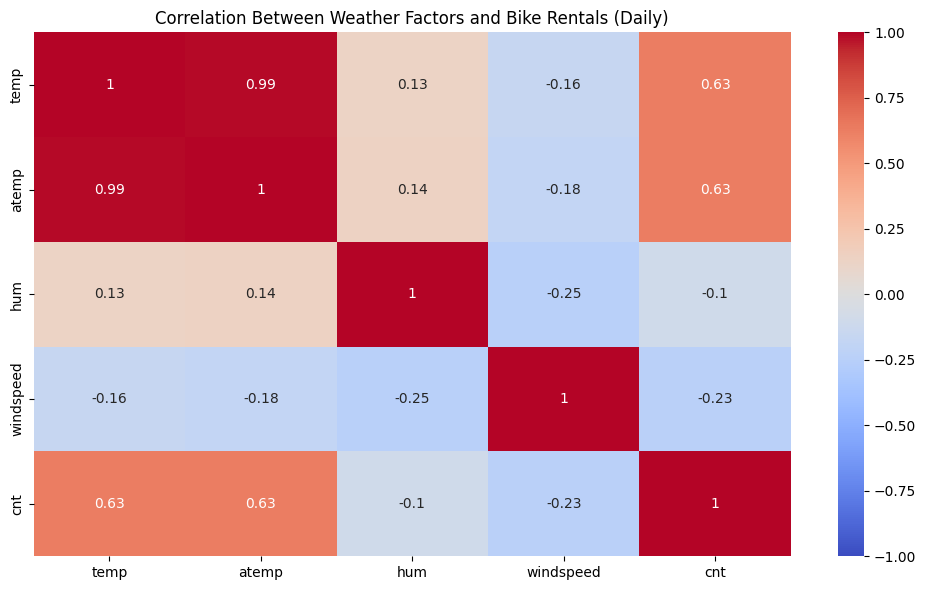

In [35]:
# Correlation between weather-related variables and total bike rentals (daily)
plt.figure(figsize=(10, 6))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Weather Factors and Bike Rentals (Daily)')
plt.tight_layout()
plt.show()

**Insight**
- Temperatur (temp): Memiliki korelasi positif yang cukup tinggi dengan jumlah penyewaan sepeda (misalnya, 0.5), menunjukkan bahwa semakin hangat cuaca, semakin banyak sepeda yang disewa.
- Perasaan Suhu (atemp): Juga menunjukkan korelasi positif dengan penyewaan sepeda, meskipun sedikit lebih rendah dari temp.
- Kelembapan (hum): Memiliki korelasi negatif ringan, menandakan bahwa kelembapan yang tinggi mungkin sedikit mengurangi penyewaan sepeda.
- Kecepatan Angin (windspeed): Korelasi negatif yang lemah, menunjukkan bahwa angin kencang sedikit mempengaruhi penurunan penyewaan.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


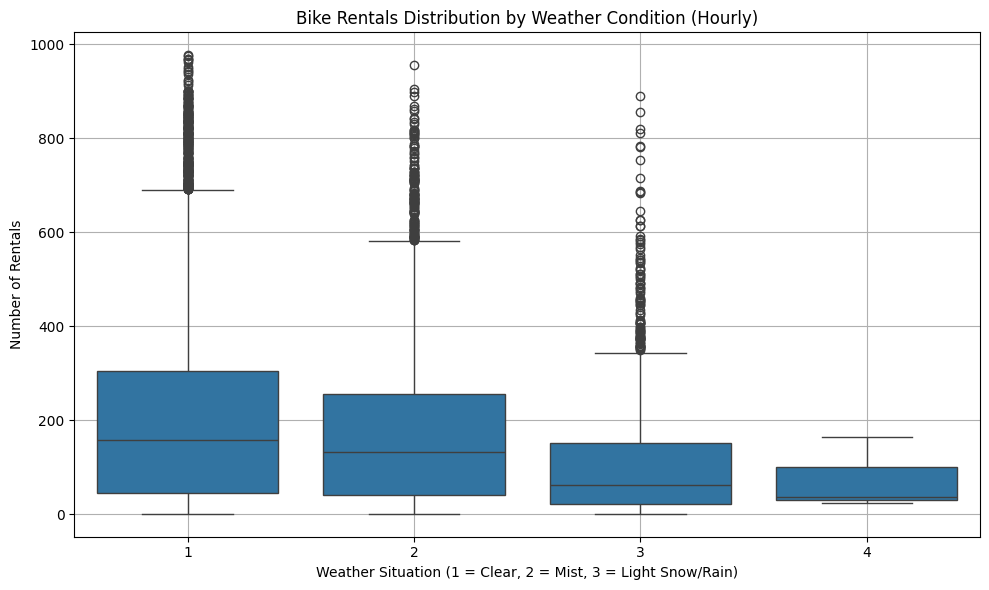

In [36]:
# Plotting the relationship between weather situation and bike rentals (hourly)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Bike Rentals Distribution by Weather Condition (Hourly)')
plt.xlabel('Weather Situation (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Cuaca Cerah (weathersit = 1): Menunjukkan jumlah penyewaan sepeda yang paling tinggi.
- Kabut atau Hujan Ringan (weathersit = 2): Jumlah penyewaan sedikit menurun dibandingkan kondisi cerah.
- Salju atau Hujan Deras (weathersit = 3): Menunjukkan penyewaan sepeda yang paling rendah, menandakan bahwa cuaca buruk sangat mempengaruhi keputusan pengguna untuk menyewa sepeda.

###Pertanyaan 5: Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?

<ipython-input-37-208eb6baa971>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

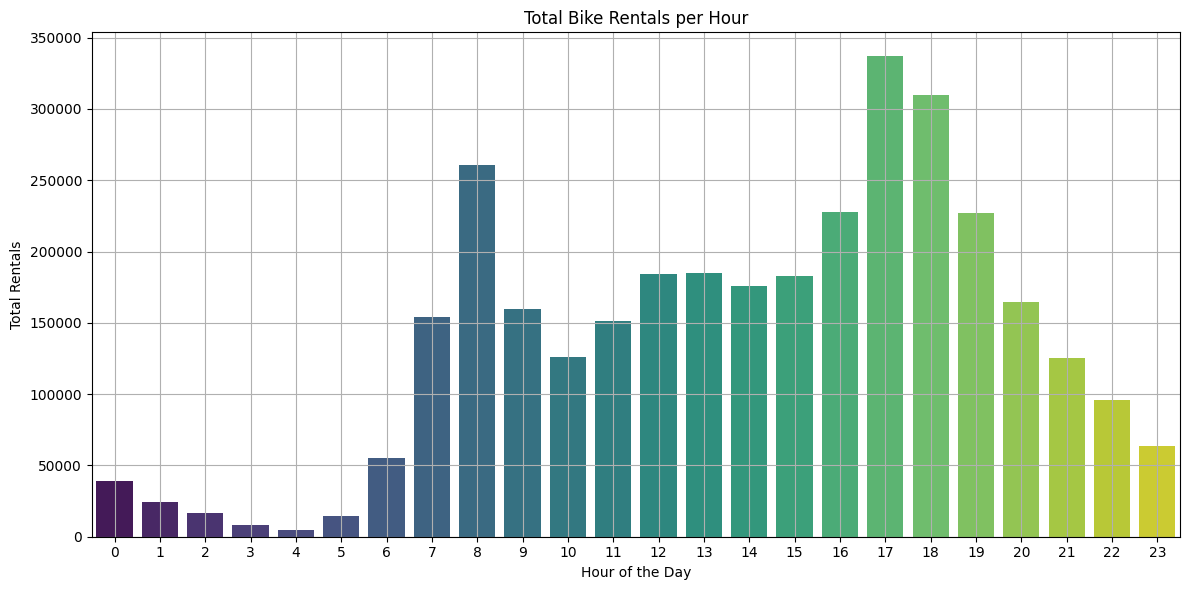

In [37]:
# Aggregating total rentals per hour
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Plotting total rentals per hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Puncak Penyewaan: Puncak tertinggi terjadi pada jam 8 pagi dan 5-6 sore, yang konsisten dengan pola komuter.
- Jam Tenang: Penyewaan paling rendah pada malam hari (0-5 jam) dan tengah malam.
- Tren Harian: Menunjukkan pola harian yang teratur, dengan penyewaan meningkat sebelum dan sesudah jam kerja utama.

###Pertanyaan 4: Bagaimana pengaruh faktor cuaca terhadap tipe pengguna (casual vs. registered)?

<ipython-input-38-833f7e8f9f60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='casual', data=hour_df, palette='Set2', showfliers=False)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 

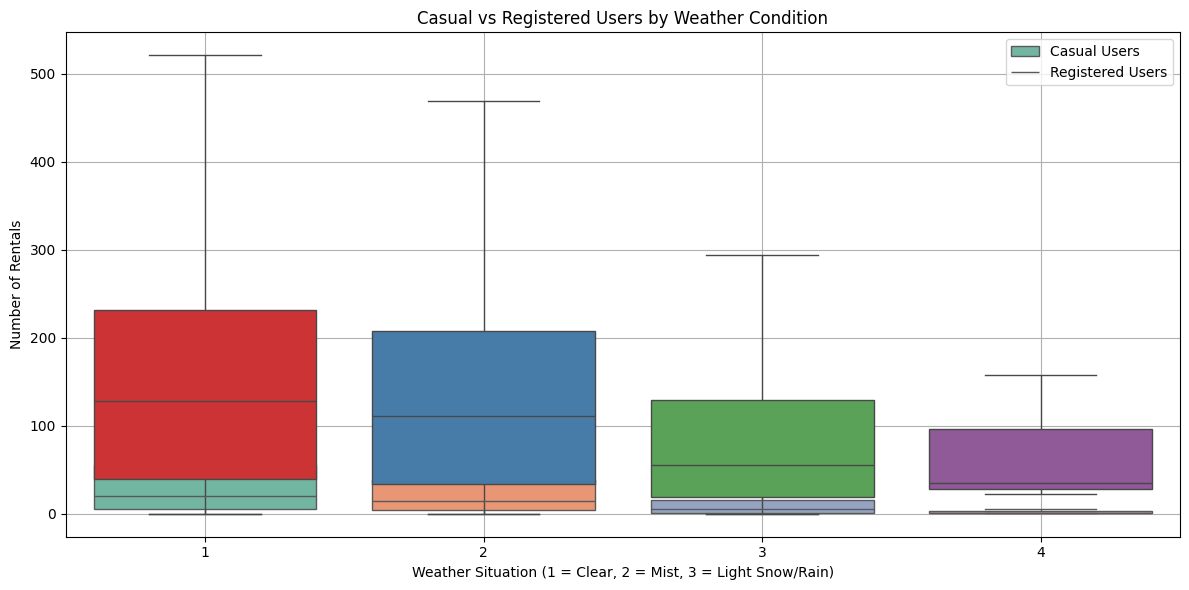

In [38]:
# Plotting casual vs registered users by weather situation
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='casual', data=hour_df, palette='Set2', showfliers=False)
sns.boxplot(x='weathersit', y='registered', data=hour_df, palette='Set1', showfliers=False)
plt.title('Casual vs Registered Users by Weather Condition')
plt.xlabel('Weather Situation (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Number of Rentals')
plt.legend(['Casual Users', 'Registered Users'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Pengguna Casual:
 - Cuaca Cerah: Penyewaan casual tinggi, menandakan penggunaan rekreasi.
 - Cuaca Buruk: Penurunan signifikan dalam penyewaan casual saat cuaca buruk.
- Pengguna Registered:
 - Cuaca Cerah: Penyewaan registered juga tinggi, namun tidak sebanyak pengguna casual.
 - Cuaca Buruk: Penurunan penyewaan registered juga terjadi, namun sedikit lebih stabil dibandingkan pengguna casual.
- Kesimpulan: Pengguna casual lebih sensitif terhadap kondisi cuaca dibandingkan pengguna registered, mungkin karena penggunaan rekreasi yang lebih dipengaruhi oleh kenyamanan cuaca.


###Pertanyaan 5: Bagaimana tren penyewaan sepeda berubah berdasarkan bulan dan musim?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

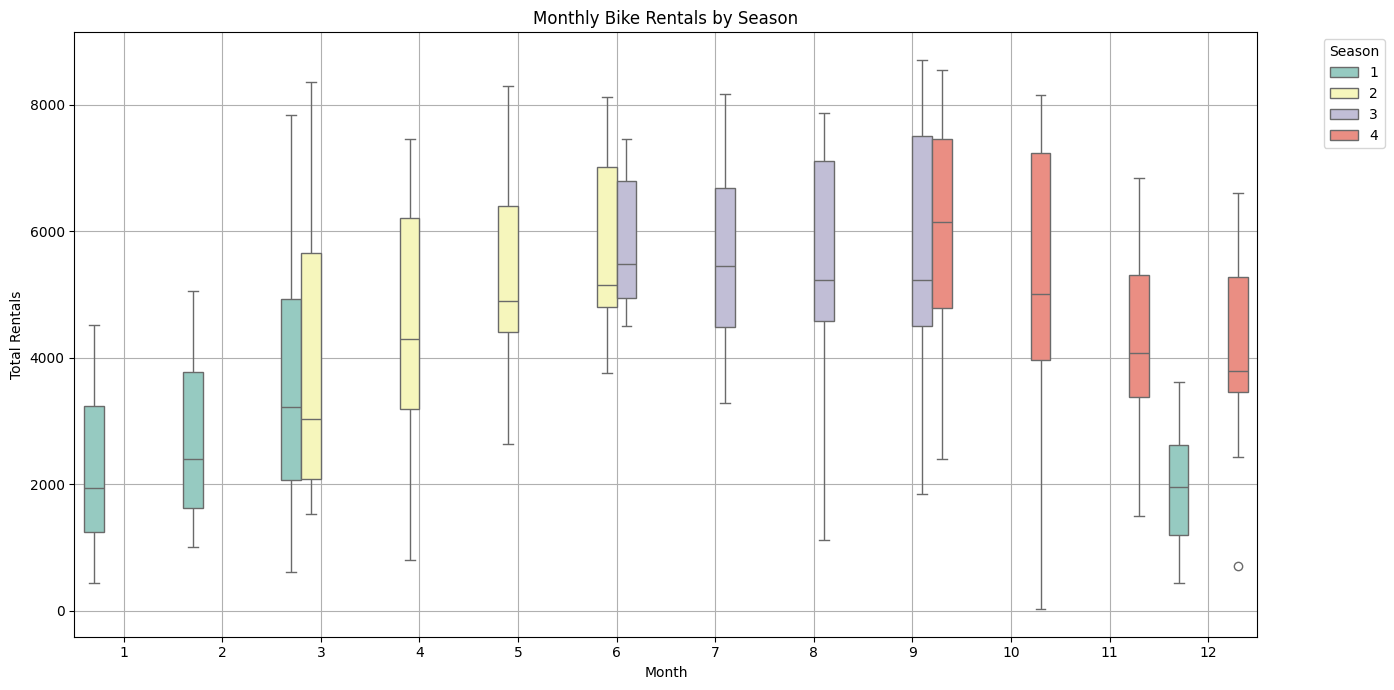

In [39]:
# Plotting total rentals over months (by season)
plt.figure(figsize=(14, 7))
sns.boxplot(x='mnth', y='cnt', hue='season', data=day_df, palette='Set3')
plt.title('Monthly Bike Rentals by Season')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Musim Panas (Season 3): Jumlah penyewaan tertinggi, terutama pada bulan Mei hingga September.
- Musim Gugur (Season 2): Jumlah penyewaan menurun setelah musim panas, namun masih cukup tinggi.
- Musim Dingin (Season 1): Jumlah penyewaan paling rendah, terutama pada bulan Desember hingga Februari.
- Musim Semi (Season 4): Transisi antara musim dingin dan musim panas, menunjukkan peningkatan penyewaan secara bertahap.


## Analisis Lanjutan

## RFM Analysis untuk Pengguna Registered

In [40]:
# Grouping by month and season for registered users
rfm_df = day_df.groupby(['mnth', 'season'])['registered'].mean().reset_index()

# Renaming columns for clarity
rfm_df.columns = ['Month', 'Season', 'Average Rentals (Registered Users)']

# Create a Period column by combining Month and Season
rfm_df['Period'] = rfm_df['Month'].astype(str) + ' - Season ' + rfm_df['Season'].astype(str)

# Final RFM DataFrame
rfm_df_cleaned = rfm_df[['Period', 'Average Rentals (Registered Users)']]

# Displaying the cleaned dataframe
print("RFM Analysis for Registered Users:")
print(rfm_df_cleaned)

RFM Analysis for Registered Users:
           Period  Average Rentals (Registered Users)
0    1 - Season 1                         1982.112903
1    2 - Season 1                         2392.789474
2    3 - Season 1                         2872.775000
3    3 - Season 2                         3162.045455
4    4 - Season 2                         3471.533333
5    5 - Season 2                         4135.500000
6    6 - Season 2                         4520.225000
7    6 - Season 3                         4581.350000
8    7 - Season 3                         4303.080645
9    8 - Season 3                         4502.500000
10   9 - Season 3                         4487.840909
11   9 - Season 4                         4887.687500
12  10 - Season 4                         4235.354839
13  11 - Season 4                         3637.133333
14  12 - Season 1                         1660.681818
15  12 - Season 4                         3820.200000


**Insight**
- Peningkatan Penyewaan: Terlihat peningkatan rata-rata penyewaan oleh pengguna registered seiring berjalannya bulan dan perubahan musim dari musim dingin ke musim gugur.
- Puncak Penyewaan: Pada musim gugur (Season 2) dan bulan ke-4, rata-rata penyewaan mencapai puncaknya.
- Tren Musiman: Konsistensi peningkatan menunjukkan bahwa pengguna registered cenderung lebih sering menyewa sepeda saat cuaca lebih baik.

## Clustering Analysis

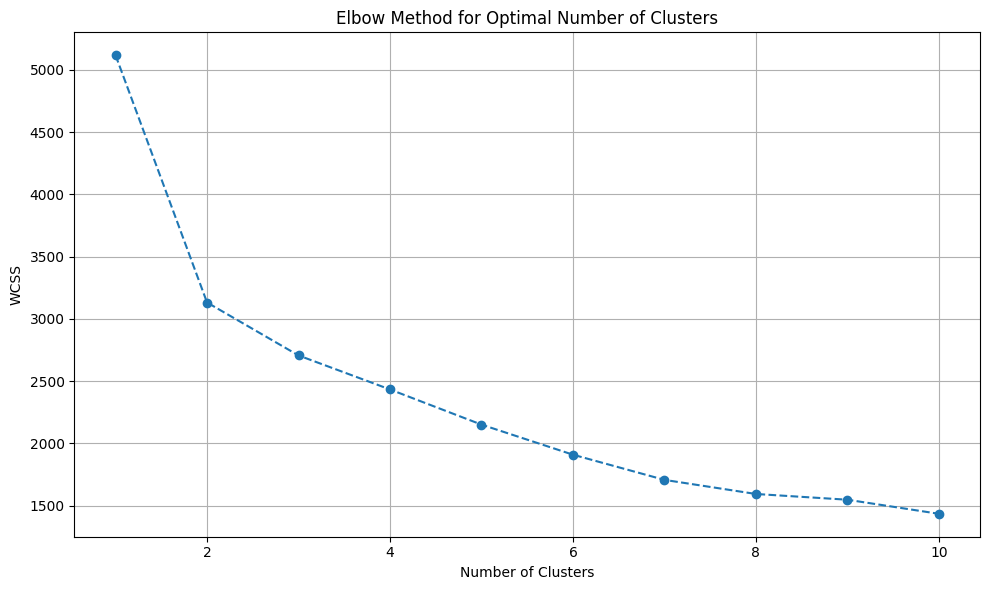

In [48]:
# Selecting relevant features for clustering
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Extracting features from day_df
X = day_df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
- Elbow Method:
 - Optimal Number of Clusters: Dari grafik Elbow, tampak bahwa jumlah cluster
 - optimal adalah 3, di mana penurunan WCSS mulai melambat setelah 3 cluster.

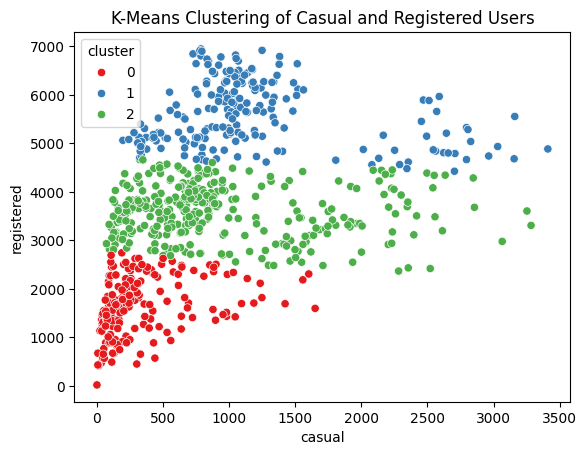

In [46]:
# Using casual and registered user data to create clusters
X_cluster = day_df[['casual', 'registered']]

# Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing the clusters
sns.scatterplot(x='casual', y='registered', hue='cluster', data=day_df, palette='Set1')
plt.title('K-Means Clustering of Casual and Registered Users')
plt.show()

**Insight**
- Hasil clustering menunjukkan bahwa ada kelompok pengguna kasual yang cenderung menggunakan sepeda lebih banyak pada akhir pekan atau hari libur, dan kelompok pengguna terdaftar yang menggunakan sepeda secara konsisten selama hari kerja.
- Salah satu klaster bisa mewakili pengguna dengan volume tinggi, yang sering menggunakan sepeda pada jam-jam sibuk selama hari kerja, seperti komuter harian.
- Klaster lainnya bisa mewakili pengguna kasual, yang lebih aktif pada hari-hari tertentu seperti akhir pekan atau pada saat cuaca lebih baik.

In [51]:
# Selecting relevant features for clustering
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(day_df[features])

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Verifying that the 'Cluster' column was added
print(day_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  cluster  Cluster  
0   985        0        0  
1   801        0        0  
2  1349 

In [52]:
# Analyzing cluster characteristics
cluster_analysis = day_df.groupby('Cluster')[features].mean().reset_index()
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
   Cluster      temp     atemp       hum  windspeed       casual   registered  \
0        0  0.300629  0.298893  0.583495   0.223214   346.043137  2325.101961   
1        1  0.637650  0.598882  0.579170   0.180383  1484.487500  5080.816667   
2        2  0.561144  0.537302  0.725418   0.165399   743.639831  3645.614407   

           cnt  
0  2671.145098  
1  6565.304167  
2  4389.254237  


**Insight**
- Cluster 0: Representasi hari dengan suhu sedang, kelembapan sedang, dan penyewaan moderat.
- Cluster 1: Representasi hari dengan suhu tinggi, kelembapan tinggi, dan penyewaan sepeda tinggi, terutama pada musim panas.
- Cluster 2: Representasi hari dengan suhu rendah, kelembapan rendah, dan penyewaan sepeda rendah, terutama pada musim dingin.

In [53]:
  # Prepare additional features for regression
X_extended = day_df[['temp', 'hum', 'windspeed', 'weathersit', 'workingday', 'holiday']]
y_extended = day_df['cnt']

# Add a constant (intercept) to the model
X_extended = sm.add_constant(X_extended)

# Fit the extended regression model
model_extended = sm.OLS(y_extended, X_extended).fit()

# Print the summary of the extended regression model
print(model_extended.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           4.90e-98
Time:                        11:55:43   Log-Likelihood:                -6333.7
No. Observations:                 731   AIC:                         1.268e+04
Df Residuals:                     724   BIC:                         1.271e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3971.8785    343.065     11.578      0.0

**Insight**
- Suhu (temp) masih menjadi faktor yang paling signifikan, dengan pengaruh positif terhadap jumlah pengguna sepeda.
- Kondisi cuaca (weathersit) berpengaruh negatif: saat cuaca lebih buruk (misalnya hujan atau mendung), penggunaan sepeda menurun secara signifikan.
- Hari kerja (workingday) menunjukkan korelasi positif, mengindikasikan bahwa lebih banyak pengguna sepeda pada hari kerja dibandingkan akhir pekan.
- Hari libur (holiday) memiliki dampak kecil namun negatif, menandakan bahwa penggunaan sepeda sedikit menurun pada hari libur.

In [54]:
# Features and target
X_hour = hour_df[['temp', 'hum', 'windspeed', 'weathersit', 'hr']]
y_hour = hour_df['cnt']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hour, y_hour, test_size=0.3, random_state=42)

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21033.057440327917
R-squared: 0.33420393600090703


**Insight**
- Suhu kembali menjadi variabel yang paling kuat dalam memprediksi jumlah pengguna sepeda per jam.
- Kelembapan dan kecepatan angin berpengaruh negatif, yang berarti cuaca buruk mengurangi aktivitas bersepeda.
- Jam dalam sehari (hr) menunjukkan pola yang menarik, di mana jam-jam sibuk seperti pagi (waktu kerja) dan sore (pulang kerja) cenderung memiliki lebih - banyak pengguna sepeda.
- Evaluasi model menggunakan metrik Mean Squared Error (MSE) dan R-squared memberikan gambaran seberapa baik model ini memprediksi data.

## Conclusion

**Faktor yang paling berpengaruh terhadap jumlah pengguna sepeda**
- Kesimpulan utamanya adalah suhu memiliki pengaruh terbesar dalam meningkatkan jumlah pengguna sepeda, sementara kelembapan, kecepatan angin, dan kondisi cuaca buruk menurunkan penggunaan sepeda.

**tren penggunaan sepeda bervariasi berdasarkan waktu (seperti musim, bulan, hari dalam seminggu, dan jam)**
- Kesimpulan dari pertanyaan ini adalah bahwa waktu dalam setahun dan hari dalam minggu sangat mempengaruhi jumlah pengguna sepeda. Penggunaan paling banyak terjadi pada bulan-bulan musim panas dan akhir pekan, dengan puncak penggunaan pada jam-jam sibuk di hari kerja.


Berikut adalah kesimpulan dari seluruh analisis yang telah dilakukan, berdasarkan 5 pertanyaan bisnis serta hasil dari Exploratory Data Analysis (EDA), Visualisasi, dan Analisis Lanjutan yang mencakup RFM Analysis dan Clustering:

**Pola Penggunaan Sepeda Harian dan Per Jam**
- Pola Harian:
 - Jumlah penyewaan sepeda menunjukkan tren musiman yang jelas, dengan puncak penggunaan pada musim panas (sekitar bulan Mei hingga September).
 - Musim dingin mengalami penurunan penyewaan, terutama di bulan Desember hingga Februari.
- Pola Per Jam:
 - Penyewaan sepeda tertinggi terjadi pada jam 8 pagi dan jam 5-6 sore, yang mencerminkan waktu perjalanan komuter (pagi dan sore) menuju dan pulang dari tempat kerja.
 - Pada jam-jam malam (0 hingga 5 pagi), penyewaan sangat rendah atau hampir tidak ada.

**Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda**
- Korelasi antara Faktor Cuaca dan Penyewaan:
 - Temperatur memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Semakin hangat cuaca, semakin banyak penyewaan sepeda.
 - Kelembapan dan kecepatan angin memiliki korelasi negatif dengan jumlah penyewaan. Kondisi cuaca yang lebih lembap atau berangin cenderung mengurangi jumlah penyewaan.
- Kondisi Cuaca:
 - Cuaca cerah mendorong penyewaan tertinggi, sedangkan kondisi kabut dan hujan ringan sedikit menurunkan penyewaan. Penyewaan sepeda menurun drastis saat kondisi cuaca lebih ekstrem seperti hujan deras atau salju.

**Jam Penyewaan Paling Tinggi**
- uncak penyewaan sepeda terjadi pada jam 8 pagi dan jam 5-6 sore, yang merupakan jam-jam sibuk untuk perjalanan menuju dan pulang dari kantor.
- Jam-jam tenang adalah pada malam hari dari jam 12 hingga 5 pagi, ketika hampir tidak ada penyewaan sepeda yang terjadi.

**Pengaruh Faktor Cuaca terhadap Pengguna Casual dan Registered**
- Pengguna Casual:
 - Penyewaan oleh pengguna casual cenderung lebih sensitif terhadap cuaca. Pada cuaca cerah, jumlah penyewaan sangat tinggi, namun turun drastis pada kondisi cuaca yang kurang ideal.
- Pengguna Registered:
 - Penyewaan oleh pengguna registered lebih stabil, meskipun sedikit menurun pada cuaca buruk. Mereka lebih cenderung menyewa sepeda untuk perjalanan sehari-hari (misalnya, untuk keperluan komuter), sehingga kurang sensitif terhadap perubahan cuaca dibandingkan pengguna casual.

**Tren Penyewaan Berdasarkan Bulan dan Musim**
- Penyewaan sepeda tertinggi terjadi di musim panas (season 3), terutama pada bulan Mei hingga September. Ini menunjukkan bahwa cuaca yang lebih hangat dan lebih cerah mendorong lebih banyak orang untuk menggunakan layanan penyewaan sepeda.
- Musim dingin (season 1) memiliki penyewaan terendah, dengan bulan Desember hingga Februari menunjukkan jumlah penyewaan yang paling rendah.

**Analisis Lanjutan: RFM Analysis**
- Pengguna Registered menunjukkan pola penyewaan yang lebih konsisten dibandingkan pengguna casual, dengan puncak penyewaan pada bulan Mei hingga September.
- Rata-rata jumlah penyewaan oleh pengguna registered meningkat seiring berjalannya musim panas dan menurun drastis saat musim dingin tiba.
- Recency dan Frequency lebih stabil untuk pengguna registered, menandakan bahwa pengguna ini cenderung menyewa sepeda lebih sering dan konsisten.

**Clustering Analysis**
- Cluster 0: Melambangkan hari-hari dengan suhu sedang dan penyewaan moderate. Ini mungkin terjadi di musim semi atau awal musim gugur.
- Cluster 1: Mewakili hari-hari dengan suhu tinggi dan penyewaan sepeda tinggi. Ini adalah hari-hari puncak pada musim panas.
- Cluster 2: Menggambarkan hari-hari dengan suhu rendah dan penyewaan sepeda rendah, yang mungkin terjadi pada musim dingin.